Performance Metrics Table:
Metric  Training Set  Testing Set
   MSE         0.990        0.991
  RMSE         0.995        0.995
   MAE         0.816        0.810
    R²         0.012       -0.004


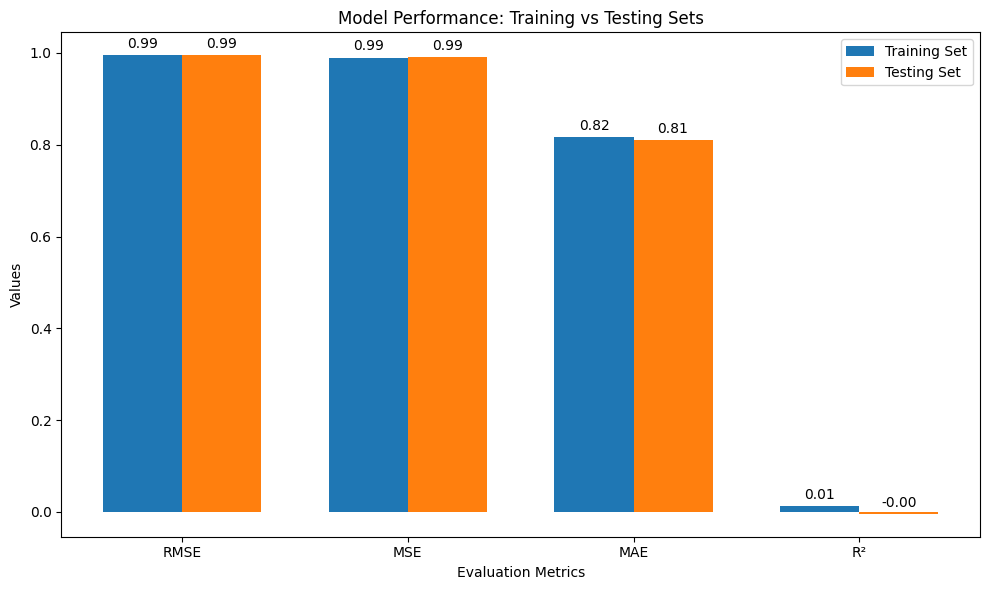

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'Processed_Fashion_Retail_Sales.csv'
data = pd.read_csv(file_path)

# Define features and target variable
features = ['Year', 'Month', 'Weekday', 'Item Purchased Encoded', 'Review Rating', 'Payment Method Encoded']
target = 'Standardized Purchase Amount (USD)'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
train_mse = round(mean_squared_error(y_train, y_train_pred), 3)
train_rmse = round(np.sqrt(train_mse), 3)
train_mae = round(mean_absolute_error(y_train, y_train_pred), 3)
train_r2 = round(r2_score(y_train, y_train_pred), 3)

test_mse = round(mean_squared_error(y_test, y_pred), 3)
test_rmse = round(np.sqrt(test_mse), 3)
test_mae = round(mean_absolute_error(y_test, y_pred), 3)
test_r2 = round(r2_score(y_test, y_pred), 3)

# Create a DataFrame for metrics
metrics_data = {
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Training Set": [train_mse, train_rmse, train_mae, train_r2],
    "Testing Set": [test_mse, test_rmse, test_mae, test_r2]
}
metrics_df = pd.DataFrame(metrics_data)

# Print the metrics table
print("Performance Metrics Table:")
print(metrics_df.to_string(index=False))

# Create a bar chart to visualize the performance metrics
metrics = ["RMSE", "MSE", "MAE", "R²"]
training_values = [train_rmse, train_mse, train_mae, train_r2]
testing_values = [test_rmse, test_mse, test_mae, test_r2]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, training_values, width, label='Training Set')
rects2 = ax.bar(x + width/2, testing_values, width, label='Testing Set')

# Add labels, title, and legend
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Values')
ax.set_title('Model Performance: Training vs Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value annotations
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
